#  Correlation, R-Square, RMSE, MAE

In [2]:
import pandas as pd

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/Data-Navigators/Statistical_Concept_Excercise/main/data/Retail_sales_dataset.csv")

# Section 1: Correlation

###  Q1: What is the correlation between Age and Total Amount in the retail dataset?

Instructions:

- Calculate the correlation between Age and Total Amount.
- Visualize the relationship using a scatter plot.


Correlation between Age and Total Amount: -0.06


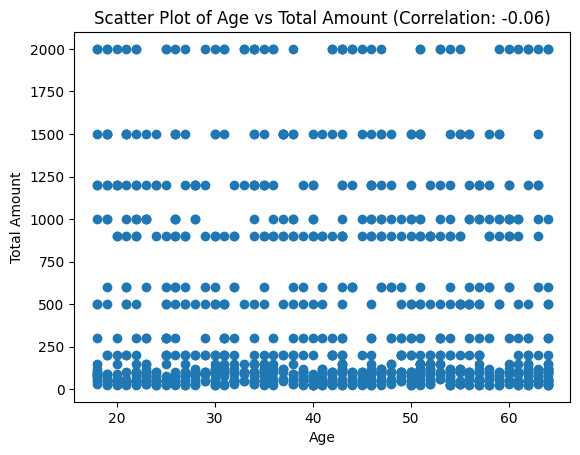

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

correlation = df['Age'].corr(df['Total Amount'])
print(f"Correlation between Age and Total Amount: {correlation:.2f}")

# Plot the relationship
plt.scatter(df['Age'], df['Total Amount'])
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title(f'Scatter Plot of Age vs Total Amount (Correlation: {correlation:.2f})')
plt.show()

# Section 2: R-Squared and Linear Regression

### Q2: How well do Quantity and Price per Unit predict Total Amount using a simple linear regression?
Instructions:

Perform linear regression with Quantity and Price per Unit as predictors and Total Amount as the response.

Calculate the R-squared value to see how well these predictors explain the variability in Total Amount.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['Quantity', 'Price per Unit']]
y = df['Total Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model and fit to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-Squared Value: {r_squared:.2f}")


R-Squared Value: 0.86


# Section 3: RMSE and MAE

### Q3: Calculate the RMSE and MAE for the regression model that predicts Total Amount.
Instructions:
Using the predictions made in the previous section, calculate the RMSE and MAE for the model's predictions.

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

RMSE: 200.68
MAE: 171.03


###  Q4: What do RMSE and MAE tell us about the model’s accuracy?
####  How would you interpret a high RMSE versus a low RMSE?

# Section 5: Additional Questions for Exploration

###  Q5: What is the relationship between Age and Total Amount? Does the relationship change if we control for the Quantity of products sold?
Instructions:

Perform a partial correlation analysis or use multiple linear regression to see if the correlation between Age and Total Amount remains significant when Quantity is included as a predictor.

In [10]:
from statsmodels.api import OLS, add_constant

# Add Quantity to the model
X = df[['Age', 'Quantity']]
X = add_constant(X)  # Add constant term to the model
y = df['Total Amount']

# Fit the linear regression model
model = OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Amount   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     82.73
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           5.75e-34
Time:                        00:54:52   Log-Likelihood:                -7669.6
No. Observations:                1000   AIC:                         1.535e+04
Df Residuals:                     997   BIC:                         1.536e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.6958     64.465      1.252      0.2